 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv('whale_returns.csv')
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isna().sum().sum()

4

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_df = pd.read_csv('algo_returns.csv')

In [6]:
# Count nulls
algo_df.isna().sum().sum()

6

In [7]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv('sp500_history.csv', parse_dates=['Date'])
sp500.head()

,Date,Close
0,2019-04-23,$2933.68
1,2019-04-22,$2907.97
2,2019-04-18,$2905.03
3,2019-04-17,$2900.45
4,2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [10]:
# Fix Data Types
#Removes "$" signs from the "Close" column and casts the data within as floating point numbers. 
sp500["Close"] = sp500["Close"].str.replace("$", "", regex=True).astype(float)
sp500["Close"]

#change "Date" column into datetime objects
sp500['Date'] =  pd.to_datetime(sp500['Date'])
#now that they are dates, sort them chronologically 
sp500.sort_values(by='Date', inplace=True)
sp500.head()
sp500.index = sp500.index.values[::-1]


In [11]:
# Calculate Daily Returns
sp500['Close'] = sp500['Close'].pct_change()
sp500.head()

,Date,Close
0,2012-10-01,NaN
1,2012-10-02,0.000872
2,2012-10-03,0.003624
3,2012-10-04,0.007174
4,2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500.dropna(inplace = True)
sp500.tail()

,Date,Close
1644,2019-04-16,0.000509
1645,2019-04-17,-0.002274
1646,2019-04-18,0.001579
1647,2019-04-22,0.001012
1648,2019-04-23,0.008841


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500.rename(columns = {'Close':'S&P500'}, inplace = True)
sp500.head()

,Date,S&P500
1,2012-10-02,0.000872
2,2012-10-03,0.003624
3,2012-10-04,0.007174
4,2012-10-05,-0.000322
5,2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Concat = pd.merge(whale_df, algo_df, on='Date')
Concat['Date'] =  pd.to_datetime(Concat['Date'])

Combined_df = pd.merge(Concat, sp500, on='Date')
Combined_df.count()
Combined_df.set_index('Date', inplace =True)
#using merge was best here as it automatically got rid of extra dates that were not in all three original csv files. 
Combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

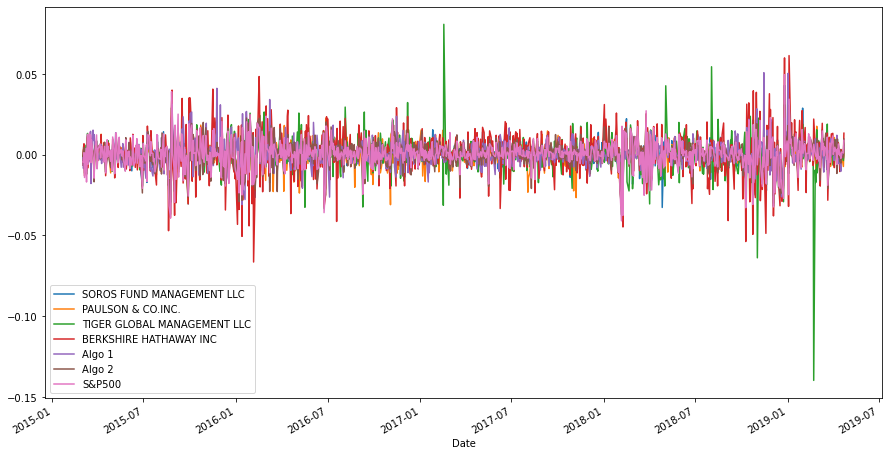

In [60]:
# Plot daily returns of all portfolios
Combined_df.plot(figsize = (15,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

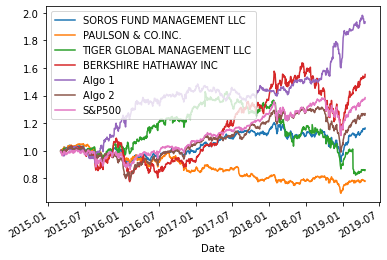

In [16]:
# Calculate cumulative returns of all portfolios
cumulatative_returns_df = (1+Combined_df).cumprod()
# Plot cumulative returns
cumulatative_returns_df.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

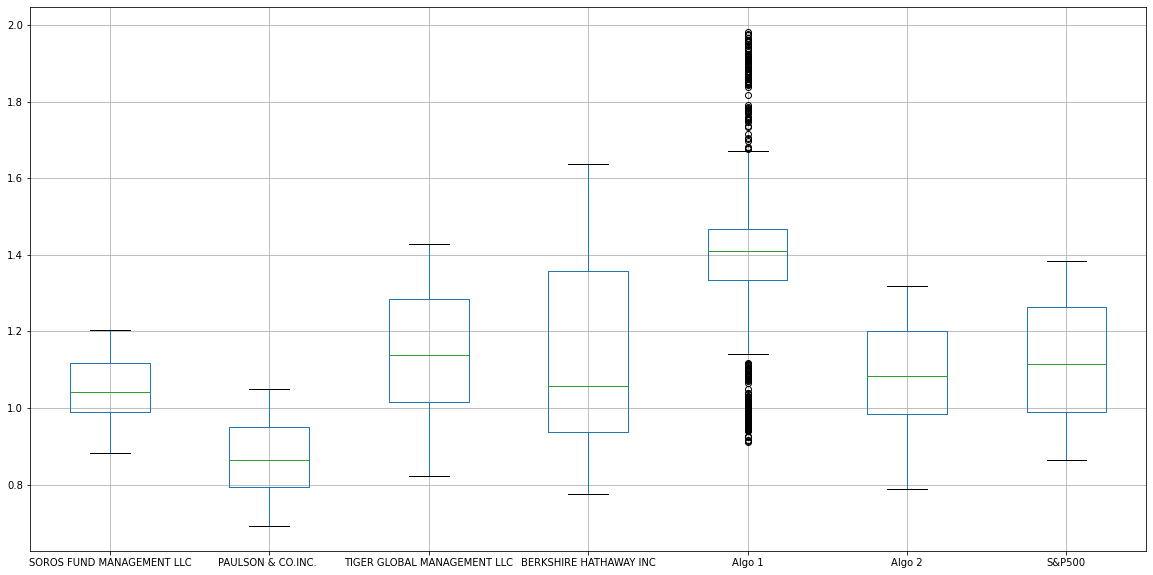

In [17]:
# Box plot to visually show risk
cumulatative_returns_df.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_std = cumulatative_returns_df.std()
all_std

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
Algo 2                         0.131700
S&P500                         0.144448
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
SP_STD = cumulatative_returns_df['S&P500'].std()
print (SP_STD)
# Determine which portfolios are riskier than the S&P 500
all_std.sort_values(inplace=True)
all_std > SP_STD

0.14444769967610394


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
Algo 2                         False
S&P500                         False
TIGER GLOBAL MANAGEMENT LLC     True
Algo 1                          True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = cumulatative_returns_df.std() * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

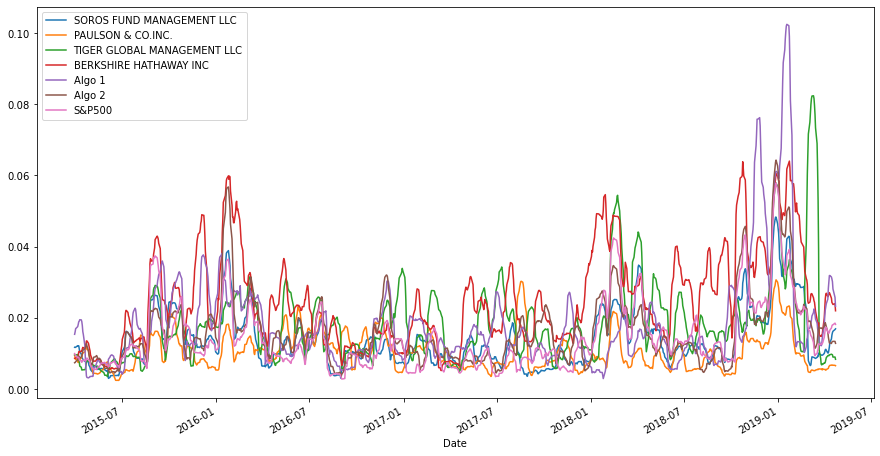

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
ma_21 = cumulatative_returns_df.rolling(21).std()
# Plot the rolling standard deviation
plt.rcParams["figure.figsize"] = (15,8)
ma_21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

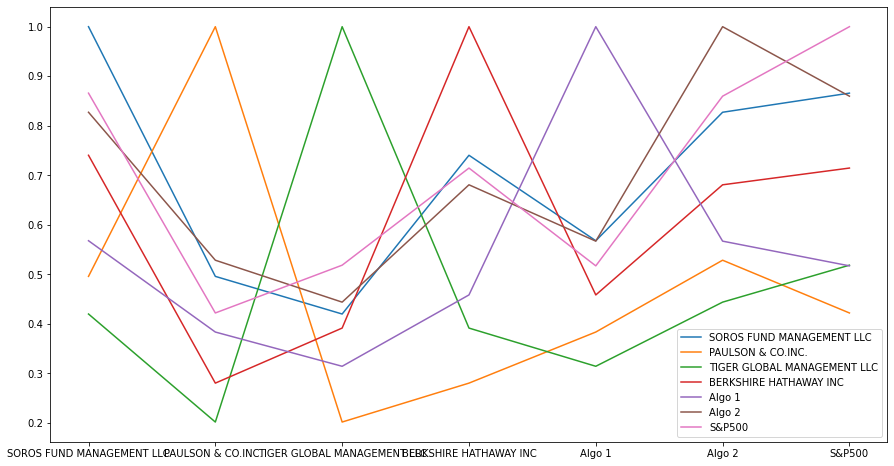

In [22]:
# Calculate the correlation
ma_21_corr = ma_21.corr(method = 'pearson')
# Display de correlation matrix
ma_21_corr.plot(figsize = (15, 8))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Berkshire Beta'}, xlabel='Date'>

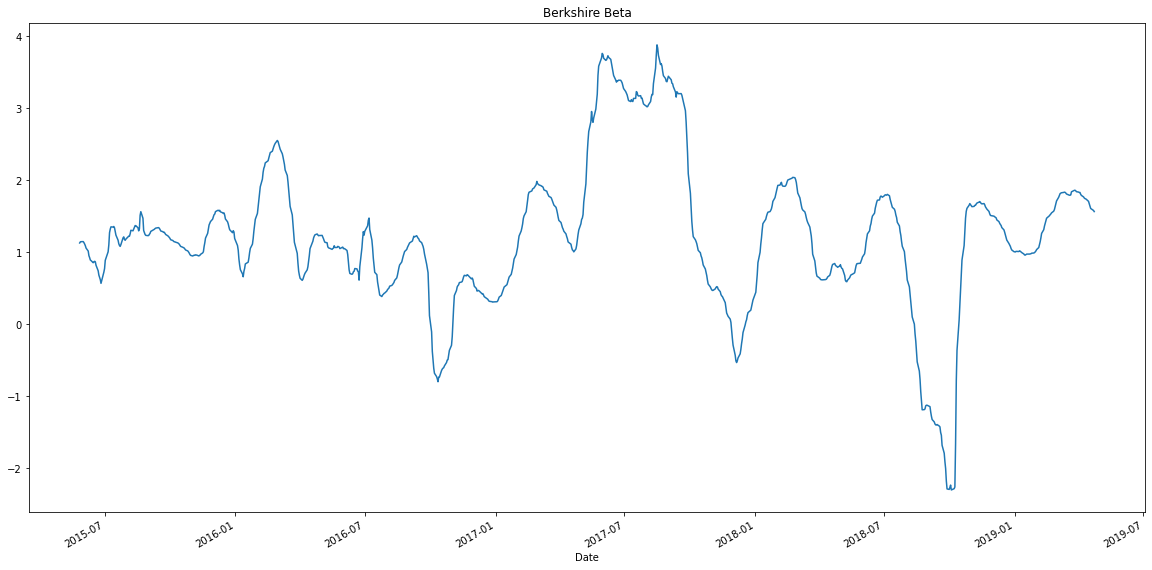

In [74]:
# Calculate covariance of a single portfolio

cov = cumulatative_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(cumulatative_returns_df['S&P500'])
# Calculate variance of S&P 500
var = cumulatative_returns_df['S&P500'].rolling(window=60).var()
# Computing beta
berkshire_beta = cov / var
# Plot beta trend

berkshire_beta.plot(title = 'Berkshire Beta', figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [76]:
# Use `ewm` to calculate the rolling window
rolling_ewma = cumulatative_returns_df.ewm(halflife=21, adjust=True).std()
rolling_ewma

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.001575,0.002281,0.001791,0.002959,0.006061,0.001707,0.003089
2015-03-05,0.003176,0.003659,0.001410,0.005510,0.005205,0.003427,0.002238
2015-03-06,0.003472,0.002964,0.004102,0.005837,0.005956,0.004884,0.007685
2015-03-09,0.003247,0.003222,0.003523,0.005976,0.007333,0.004682,0.007333
...,...,...,...,...,...,...,...
2019-04-16,0.042208,0.015494,0.073149,0.089692,0.087688,0.054109,0.047713
2019-04-17,0.042286,0.015263,0.072171,0.089413,0.086404,0.053736,0.047742
2019-04-18,0.042368,0.015045,0.071190,0.089152,0.085122,0.053305,0.047789


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharp_ratio = (Combined_df.mean() * 252) / (Combined_df.std() * np.sqrt(252))
sharp_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

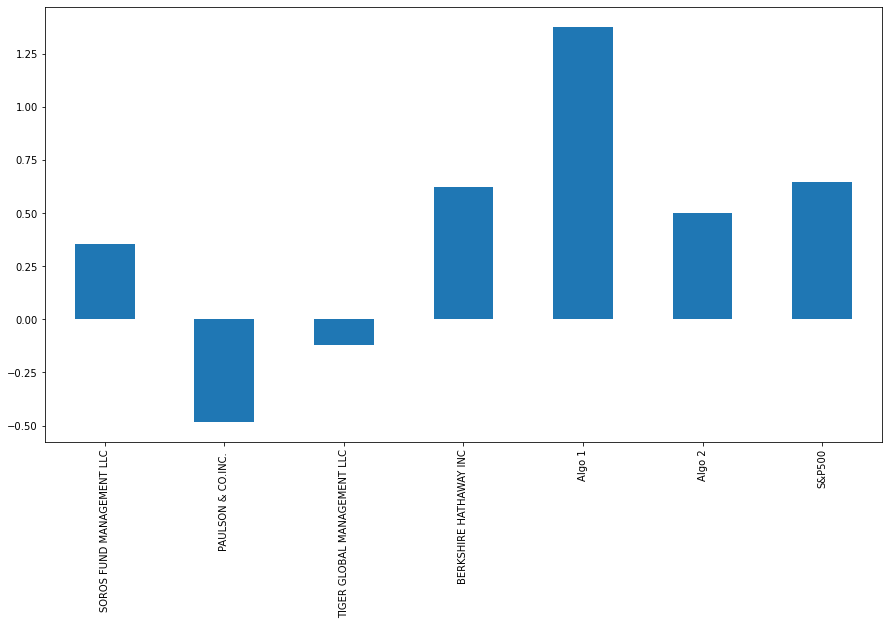

In [26]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
nflx_df = pd.read_csv('NFLX (1).csv')
nflx_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,63.087143,65.339996,63.049999,64.881432,64.881432,24612700
1,2015-01-28,64.741432,64.821426,63.081429,63.208572,63.208572,24532900
2,2015-01-29,63.204285,63.927143,62.500000,63.400002,63.400002,15127700
3,2015-01-30,63.132858,63.984287,62.655712,63.114285,63.114285,13215300
4,2015-02-02,62.842857,63.428570,61.955715,63.009998,63.009998,12990600


In [28]:
# Reading data from 2nd stock
mktx = pd.read_csv('MKTX.csv')
mktx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,73.269997,74.629997,73.269997,74.150002,70.212402,108800
1,2015-01-28,76.099998,78.489998,72.830002,73.260002,69.369667,164700
2,2015-01-29,73.610001,76.489998,73.610001,75.949997,71.916794,261000
3,2015-01-30,75.250000,77.300003,75.070000,75.970001,71.935753,205300
4,2015-02-02,76.120003,76.849998,74.720001,75.080002,71.093018,330400


In [29]:
# Reading data from 3rd stock
dpz = pd.read_csv('DPZ.csv')
dpz.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,98.050003,99.379997,97.760002,98.930000,91.974495,346300
1,2015-01-28,99.800003,100.949997,98.940002,99.889999,92.866997,478700
2,2015-01-29,100.129997,101.599998,99.029999,101.290001,94.168556,530700
3,2015-01-30,100.430000,101.169998,99.019997,99.050003,92.086052,468700
4,2015-02-02,99.599998,99.779999,96.760002,98.080002,91.184258,423200


In [30]:
# Combine all stocks in a single DataFrame
Concat_personal_portfolio = pd.merge(nflx_df, mktx, on='Date')
combined_df2 = pd.merge(Concat_personal_portfolio, dpz, on = 'Date')
combined_df2.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,63.087143,65.339996,63.049999,64.881432,64.881432,24612700,73.269997,74.629997,73.269997,74.150002,70.212402,108800,98.050003,99.379997,97.760002,98.930000,91.974495,346300
1,2015-01-28,64.741432,64.821426,63.081429,63.208572,63.208572,24532900,76.099998,78.489998,72.830002,73.260002,69.369667,164700,99.800003,100.949997,98.940002,99.889999,92.866997,478700
2,2015-01-29,63.204285,63.927143,62.500000,63.400002,63.400002,15127700,73.610001,76.489998,73.610001,75.949997,71.916794,261000,100.129997,101.599998,99.029999,101.290001,94.168556,530700
3,2015-01-30,63.132858,63.984287,62.655712,63.114285,63.114285,13215300,75.250000,77.300003,75.070000,75.970001,71.935753,205300,100.430000,101.169998,99.019997,99.050003,92.086052,468700
4,2015-02-02,62.842857,63.428570,61.955715,63.009998,63.009998,12990600,76.120003,76.849998,74.720001,75.080002,71.093018,330400,99.599998,99.779999,96.760002,98.080002,91.184258,423200


In [31]:
# Reset Date index
combined_df2.set_index('Date', inplace =True)


In [32]:
# Reorganize portfolio data by having a column per symbol
combined_df2.drop(columns=['Open_x', 'High_x', 'Low_x', 'Adj Close_x', 'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Adj Close_y', 'Volume_y',
                           'Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
names = ['NFLX close', 'MKTX close', 'DPZ close']
combined_df2.columns=names

In [33]:
# Calculate daily returns
daily_returns = combined_df2.pct_change()
# Drop NAs
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.head()

,NFLX close,MKTX close,DPZ close
Date,,,
2015-01-28,-0.025783,-0.012003,0.009704
2015-01-29,0.003029,0.036718,0.014015
2015-01-30,-0.004507,0.000263,-0.022115
2015-02-02,-0.001652,-0.011715,-0.009793
2015-02-03,0.035935,0.011588,0.013153


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)
# Display sample data
weighted_returns.head()

Date
2015-01-28   -0.009361
2015-01-29    0.017921
2015-01-30   -0.008786
2015-02-02   -0.007720
2015-02-03    0.020225
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
weighted_returns = weighted_returns.reset_index()
weighted_returns.columns = ['Date', 'My returns']
weighted_returns['Date'] =  pd.to_datetime(weighted_returns['Date'])
Combined_df.reset_index()
all_returns_df = pd.merge(weighted_returns, Combined_df, on='Date')
all_returns_df.set_index('Date', inplace =True)
all_returns_df.head()

,My returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2015-03-03,-0.011416,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.012607,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.007650,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.024713,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.000417,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
annualized_all = all_returns_df.std() * np.sqrt(252)
annualized_all.head()

My returns                     0.219893
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

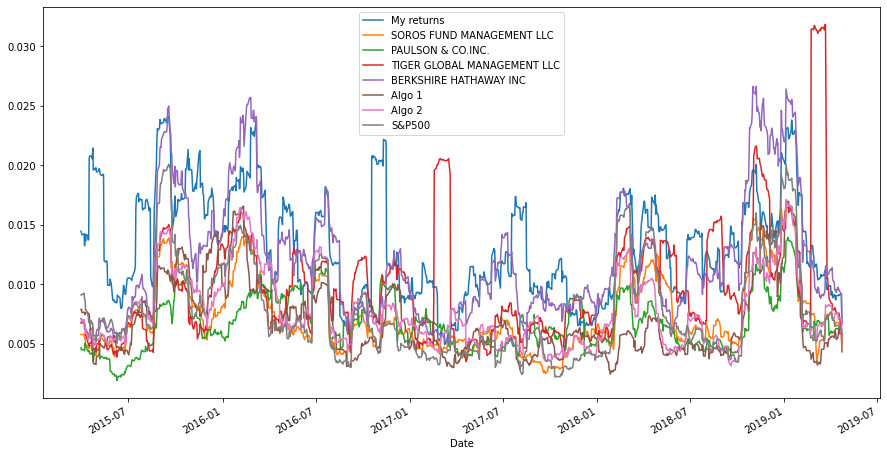

In [45]:
# Calculate rolling standard deviation
all_ma_21 = all_returns_df.rolling(21).std()

# Plot rolling standard deviation
plt.rcParams["figure.figsize"] = (15,8)
all_ma_21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

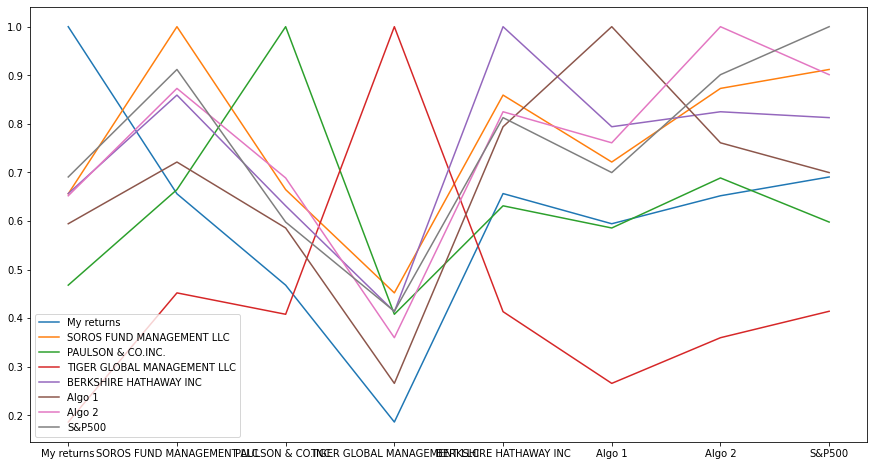

In [46]:
# Calculate and plot the correlation
all_21_corr = all_ma_21.corr(method = 'pearson')
all_21_corr.plot(figsize = (15, 8))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Beta'}, xlabel='Date'>

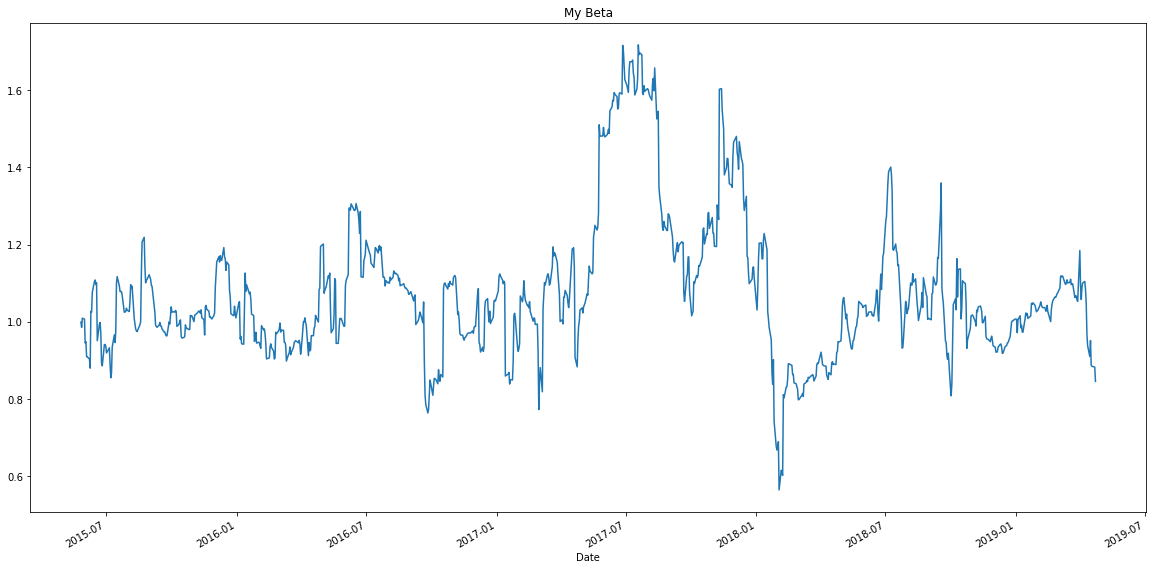

In [80]:
# Calculate and plot Beta
my_cov = all_returns_df['My returns'].rolling(window=60).cov(all_returns_df['S&P500'])
my_variance = all_returns_df['S&P500'].rolling(window=60).var()
my_beta = my_cov/my_variance
my_beta.plot(title="My Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
all_sharp_ratio = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
all_sharp_ratio

My returns                     1.646039
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

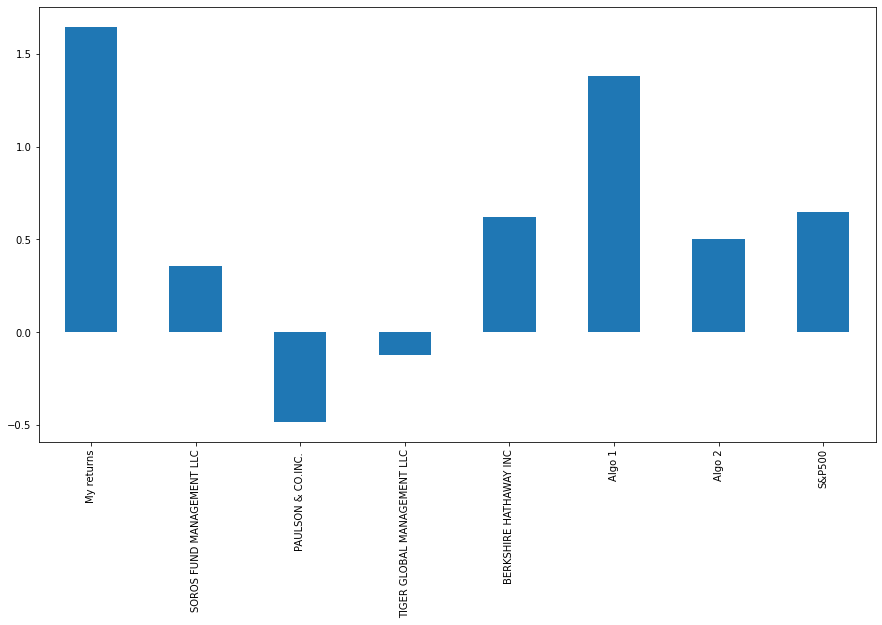

In [50]:
# Visualize the sharpe ratios as a bar plot
all_sharp_ratio.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

<AxesSubplot:xlabel='Date'>

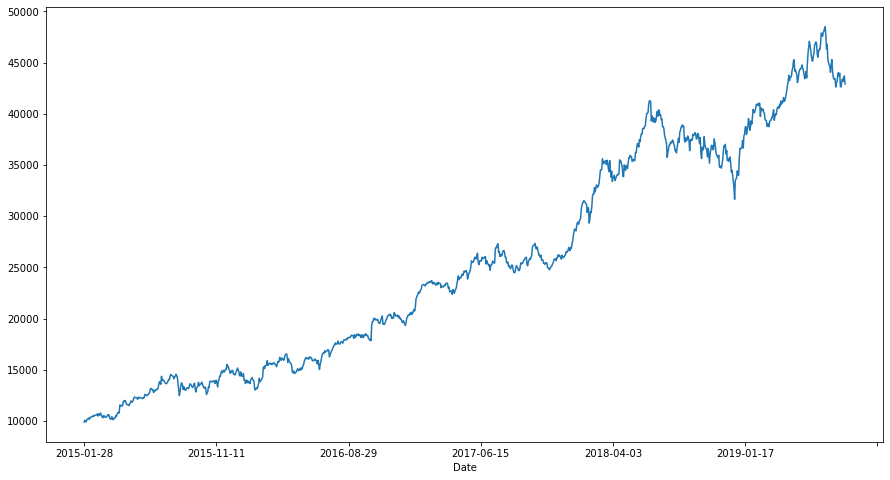

In [54]:
initial_investment = 10000
weighted_returnss = daily_returns.dot(weights)

cumulative1 = (1+weighted_returnss).cumprod()
(initial_investment * cumulative1).plot(figsize = (15,8))

<AxesSubplot:xlabel='Date'>

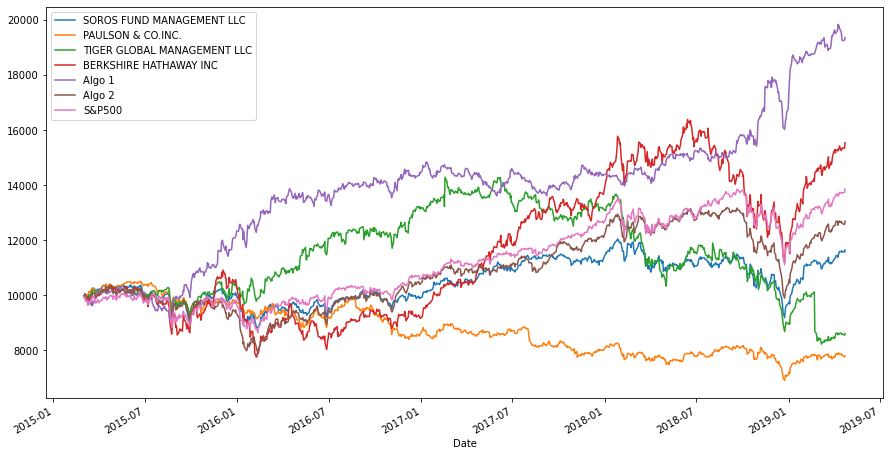

In [59]:
cumulative2 = (1 + Combined_df).cumprod()
(initial_investment * cumulative2).plot(figsize = (15,8))

In [ ]:
'''$10,000 invested in my portfolio is shown above. 10,000 invested in each of the provided portfolios is shown below. Using the power of hindsight, I absolutely
crushed the best investors in the world with my chosen 3 stocks. It wasn't even close.'''